## Linear Regression Example: Auto MPG Data Set

### Mounting the Google Drive

When working with Colab notebooks you will often need to access data stored on your Google Drive. To get access to this data you must first mount your Google Drive. To do that follow these simple steps:

1. Import the `drive` utility by running `from google.colab import drive`
2. Run `drive.mount(/content/gdrive)`. 
3. You will see the output shown below. Click on the link.

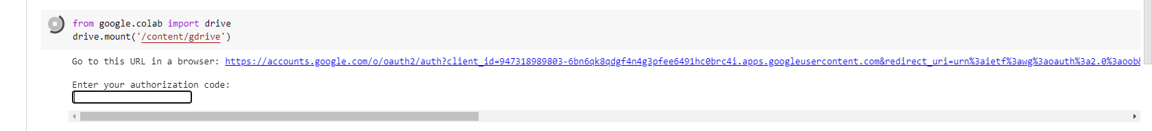

4. Clicking of the link will open a new tab in your browser. Click on your Google account icon (if you have more than one Google account then you will have to decide which one of them you want to mount to your Colab notebook).

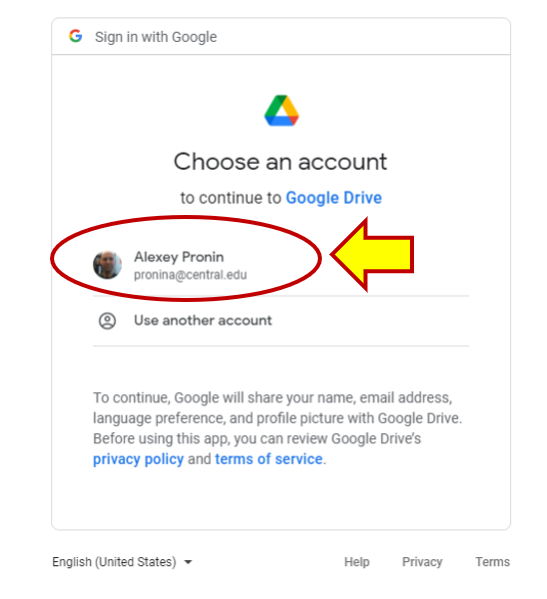

5. On the next screen, click the "Allow" button located in the bottom right corner.

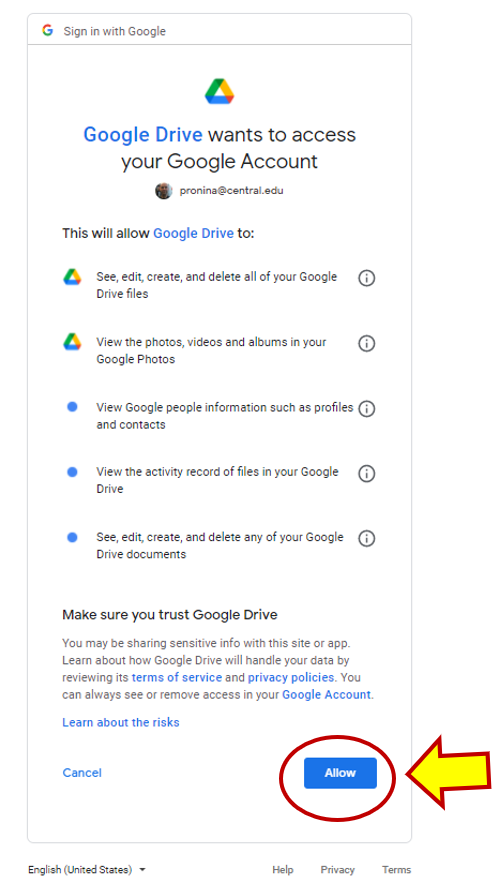

6. Next, you will be given a security code. Copy this code to the clipboard by clicking on the icon located on the right side of the code that looks like two pages placed on top of one another. 

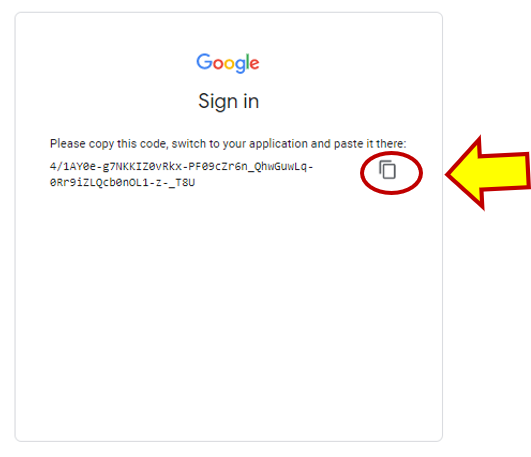

7. Go back to your Colab notebook, paste the security code into the provided space, and hit the ENTER button. This should complete the process.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Loading Libraries and Data

We will need to load the NumPy library to work with NumPy arrays. In addition, we are going to import the `Path` function from the Python built-in `pathlib` library.

In [ ]:
import numpy as np
from pathlib import Path

The root directory of my (and yours) Google Drive has the following path: `/content/gdrive/My Drive/`. The full path to the data that we need to access looks like this:

In [ ]:
PATH = Path('/content/gdrive/My Drive/Colab Notebooks/Applied_Machine_Learning/Data/Auto_MPG')

Note that we are using the `Path` function to create this path. In principle, we could have just creates a simple string storing this path but then we would need to remember to change this path if we ever decide to run our notebook on a Windows computers -- in Windows, when building a full filename that includes the complete path we separate different directories and the file name with backslashes while on Linux computers we use forward slashes. The `Path` function takes care of this problem for us -- it automatically adjusts our path depending on the type of our operating system. This way our code becomes more portable which is a good thing! 

To illustrate the main ideas of *linear regression* we will be using a famous *Auto MPG* data set which is freely available for download from the  [University of California Irvine (UCI) Machine Learing Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg). The dataset holds information about the characteristics of many different cars that where manufactured in the US, Europe, and Japan from 1970 to 1982. These characteristics include the weights of the cars, their city-cycle fuel consumption in miles per gallon, accelerations, the numbers of cyclinders, the place of origin, etc. In what follows we will be focusing on two of these characterisitcs which we will load as NumPy arrays (note how we added the filenames to the `PATH` vairable to create the full paths to the files):

In [ ]:
hp = np.load(PATH/'horsepower.npy')
dis = np.load(PATH/'displacement.npy')

The `hp` array holds information about the power output of various cars in horse powers and the `dis` array holds information about the engine displacements of the cars. By the way, if you don't know what *engine displacement* is please read the following definition from a [Wikipidea article](https://en.wikipedia.org/wiki/Engine_displacement):

*Engine displacement* is the measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the combustion chambers. It is commonly used as an expression of an engine's size, and by extension as a loose indicator of the power an engine might be capable of producing and the amount of fuel it should be expected to consume.

Based on this definition, it is reasonable to expect that the engine displacements and the power outputs must be somehow related to one another. In what follows we will try to explore this relation. But first of all, let's take a quick look at the data:

In [ ]:
print(dis.shape)
print(hp.shape)

(398,)
(398,)


### Data visualization

It looks like we have information about horseposers and displacements of 398 cars! Let's create a simple two-dimensional plot of these variables to get a better idea about how they are related to one another. We will be treating the displacement as our independent variable and plot it on the horizontal axis. The horsepower will be treated as a dependent variable; we will plot it on the vertical axis.

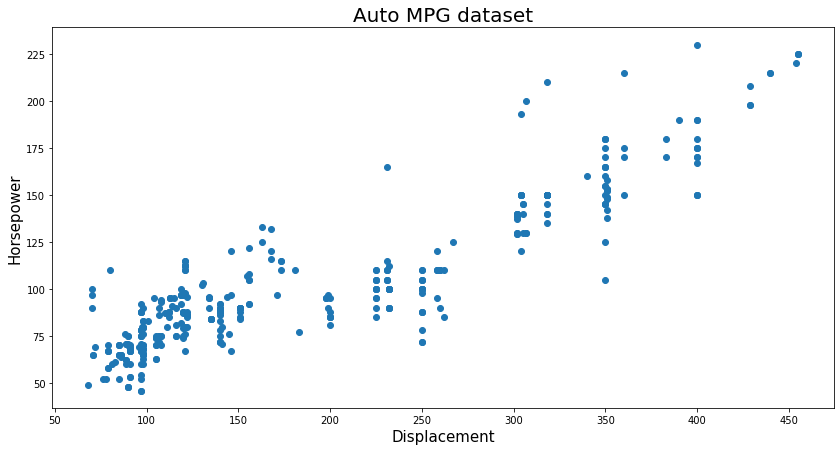

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(14, 7))

plt.plot(dis, hp, 'o')

plt.xlabel("Displacement", fontsize=15)
plt.ylabel("Horsepower", fontsize=15)

plt.title("Auto MPG dataset", fontsize=20)

plt.show()

Yes, it looks like these variables are related to each other. Also, we can try fitting these data points with a straight line -- it seems to be a reasonable choice here. 

Let's assume that the equation describing the straight line that fits our data in the best possible way looks like this: $y = \hat\theta_1 x + \hat\theta_0$, where $x$ and $y$ are the displacement and the horsepower variables, respectively, $\hat\theta_1$ is the slope, and $\hat\theta_0$ is the vertical intercept of the line. Finding this line is equivaluent to building a simple machine learning model that allows us to predict the value of the dependent variable (horsepower)  for any given value of the independent variable (displacement). 

By the way, in data science, independent variable are often called *features* and dependent variables are called *labels*. In light of what we just learned, we can say that features are our input variables and labels are the things we are predicting. In our example, there is only one feature, the engine's displacement, and our label here is the horsepower output of the engine.

### Missing values

But before we move any further, let's take a look at the following slice of the `hp` data:

In [ ]:
print(hp[330:340])

[ nan  67.  62. 132. 100.  88.  nan  72.  84.  84.]


What does `nan` stand for? `nan` means *not a number* in Python. This is an example of missing data -- the corresponding value of the horsepower is not available. There might be various reasons for that. It is possible that this value was never recorded in the first place, or maybe this entry was somehow corrupted: trying to compute  a square root of a negtive number or to divide a number by zero will lead to the `nan` output. Anyway, but before proceeding any further, we need to do something with the missing data. At this point we will adopt the simplest possible method for dealing with missing values -- we will simple remove the corresponding entries from our data set. But this is not the only viable route -- in some cases you might want to try filling the missing values. We will talk about it later. 

To remove mising values we should find them we use the .isnan function for the boolean mask

In [ ]:
mask_hp = np.isnan(hp)
mask_dis = bp.isnan(dis)
mask_hp[slice]
print(np.count_nonzero(mask_hp)) do same with dis

6 missing values in the horsepower data and not missing values in engine displacement data good.

Least squares fitting and Sanity Checks
